In [171]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib as mpl
from matplotlib.lines import Line2D
from pathlib import Path
import os
import pickle


from openpyxl.styles.builtins import title
from torch.backends.cudnn import allow_tf32

plot_folder = Path('/Users/jg/Desktop/upper_limb/paper_figures-2')
os.makedirs(plot_folder, exist_ok=True)
data_folder = Path('/Users/jg/Desktop/upper_limb/paper_data-2')


In [172]:
participants = ['P_149', 'P_238', 'P_407', 'P_426', 'P_577', 'P_668', 'P_711', 'P_950', 'P7_453', 'P6_820']
online_participants = ['P_149', 'P_238', 'P_407', 'P_426', 'P_577', 'P_668', 'P_711', 'P_950', 'P7_453']
targets = ['indexAng', 'midAng', 'ringAng', 'pinkyAng', 'thumbInPlaneAng', 'thumbOutPlaneAng', 'wristFlex']
recordings = ['thumbFlEx', 'thumbAbAd', 'indexFlEx', 'mrpFlEx', 'fingersFlEx', 'wristFlEx', 'handOpCl', 'pinchOpCl', 'pointOpCl']
test_recordings = ['keyOpCl', 'wristFlHandCl', 'indexFlDigitsEx']

df = pd.DataFrame(index=participants, columns=pd.MultiIndex.from_product([['init', 'offline', 'comp', 'comp_interp', 'pert_init', 'pert_offline', 'pert_comp', 'pert_comp_interp'], ['val', 'test', 'total']]))
df.loc[:, 'participants'] = df.index



In [173]:
# deals with the shorter online recordings for 'P7_453', 'P6_820'
def deal_w_nan(data):
    complete = data.iloc[-1].dropna().index
    mask_nan = data.loc[:, complete].isna().any(axis=1)
    if mask_nan.any():
        data.fillna(method='ffill', inplace=True)
        data = data[~mask_nan]
    data = data.reset_index(drop=True)
    return data

In [174]:
# init
mapping = pd.read_csv(data_folder / 'offline_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'init')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'init'), inplace=True)

# val
data = pd.read_csv(data_folder / 'offline_val_loss.csv')
data = deal_w_nan(data)
    
for key in df.index:
    df.loc[key, ('init', 'val')] = data.loc[0, f'{key} - total_val_loss']
    
# test
data = pd.read_csv(data_folder / 'offline_test_loss.csv')
data = deal_w_nan(data)

    
for key in df.index:
    df.loc[key, ('init', 'test')] = data.loc[0, f'{key} - total_test_loss']
    
# total
df.loc[:, ('init', 'total')] = (df.loc[:, ('init', 'val')] * 9 + df.loc[:, ('init', 'test')] * 3) / 12

In [175]:
# offline
df.set_index('participants', inplace=True, drop=False)
mapping = pd.read_csv(data_folder / 'offline_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'offline')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'offline'), inplace=True)

# val
data = pd.read_csv(data_folder / 'offline_val_loss.csv')
data = deal_w_nan(data)

    
for key in df.index:
    df.loc[key, ('offline', 'val')] = data.loc[len(data)-1, f'{key} - total_val_loss']
    
# test
data = pd.read_csv(data_folder / 'offline_test_loss.csv')
data = deal_w_nan(data)

    
for key in df.index:
    df.loc[key, ('offline', 'test')] = data.loc[len(data)-1, f'{key} - total_test_loss']
    
# total
df.loc[:, ('offline', 'total')] = (df.loc[:, ('offline', 'val')] * 9 + df.loc[:, ('offline', 'test')] * 3) / 12

In [176]:
# pert_init
df.set_index('participants', inplace=True, drop=False)
mapping = pd.read_csv(data_folder / 'pert_offline_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'pert_init')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'pert_init'), inplace=True)

In [177]:
# val
data = pd.read_csv(data_folder / 'pert_offline_val_loss.csv')
data = deal_w_nan(data)

    
for key in df.index:
    df.loc[key, ('pert_init', 'val')] = data.loc[0, f'{key} - total_val_loss']

# test
data = pd.read_csv(data_folder / 'pert_offline_test_loss.csv')
data = deal_w_nan(data)

    
for key in df.index:
    df.loc[key, ('pert_init', 'test')] = data.loc[0, f'{key} - total_test_loss']

# total
df.loc[:, ('pert_init', 'total')] = (df.loc[:, ('pert_init', 'val')] * 9 + df.loc[:, ('pert_init', 'test')] * 3) / 12

In [178]:
# pert_offline
df.set_index('participants', inplace=True, drop=False)
mapping = pd.read_csv(data_folder / 'pert_offline_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'pert_offline')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'pert_offline'), inplace=True)

# val
data = pd.read_csv(data_folder / 'pert_offline_val_loss.csv')
data = deal_w_nan(data)

    
for key in df.index:
    df.loc[key, ('pert_offline', 'val')] = data.loc[len(data)-1, f'{key} - total_val_loss']
    
# test
data = pd.read_csv(data_folder / 'pert_offline_test_loss.csv')
data = deal_w_nan(data)

    
for key in df.index:
    df.loc[key, ('pert_offline', 'test')] = data.loc[len(data)-1, f'{key} - total_test_loss']
    
# total
df.loc[:, ('pert_offline', 'total')] = (df.loc[:, ('pert_offline', 'val')] * 9 + df.loc[:, ('pert_offline', 'test')] * 3) / 12

In [179]:
# online
data = pd.read_csv(data_folder / 'online.csv')
data.set_index('Name', inplace=True)
df.set_index('participants', inplace=True, drop=False)
for participant in online_participants:
    df.loc[participant, ('online', 'val')] = data.loc[participant, 'last.total_val_loss']
    df.loc[participant, ('online', 'test')] = data.loc[participant, 'last.total_test_loss']
df.loc[:, ('online', 'total')] = (df.loc[:, ('online', 'val')] * 9 + df.loc[:, ('online', 'test')] * 3) / 12


In [180]:
# pert_online
data = pd.read_csv(data_folder / 'pert_online.csv')
data = deal_w_nan(data)
data.set_index('Name', inplace=True)
df.set_index('participants', inplace=True, drop=False)
for participant in online_participants:
    df.loc[participant, ('pert_online', 'val')] = data.loc[participant + '_perturb', 'last.total_val_loss']
    df.loc[participant, ('pert_online', 'test')] = data.loc[participant  + '_perturb', 'last.total_test_loss']
df.loc[:, ('pert_online', 'total')] = (df.loc[:, ('pert_online', 'val')] * 9 + df.loc[:, ('pert_online', 'test')] * 3) / 12

In [181]:
# comp
df.set_index('participants', inplace=True, drop=False)
mapping = pd.read_csv(data_folder / 'comp_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'comp')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'comp'), inplace=True)

# val
data = pd.read_csv(data_folder / 'comp_val_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    df.loc[key, ('comp', 'val')] = data.loc[len(data)-1, f'{key} - total_val_loss']
    
# test
data = pd.read_csv(data_folder / 'comp_test_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    df.loc[key, ('comp', 'test')] = data.loc[len(data)-1, f'{key} - total_test_loss']
    
# total
df.loc[:, ('comp', 'total')] = (df.loc[:, ('comp', 'val')] * 9 + df.loc[:, ('comp', 'test')] * 3) / 12

In [182]:
# pert_comp
df.set_index('participants', inplace=True, drop=False)
mapping = pd.read_csv(data_folder / 'pert_comp_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'pert_comp')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'pert_comp'), inplace=True)

# val
data = pd.read_csv(data_folder / 'pert_comp_val_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    df.loc[key, ('pert_comp', 'val')] = data.loc[len(data)-1, f'{key} - total_val_loss']
    
# test
data = pd.read_csv(data_folder / 'pert_comp_test_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    df.loc[key, ('pert_comp', 'test')] = data.loc[len(data)-1, f'{key} - total_test_loss']
    
# total
df.loc[:, ('pert_comp', 'total')] = (df.loc[:, ('pert_comp', 'val')] * 9 + df.loc[:, ('pert_comp', 'test')] * 3) / 12

In [183]:
# comp_interp
df.set_index('participants', inplace=True, drop=False)
mapping = pd.read_csv(data_folder / 'comp_interp_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'comp_interp')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'comp_interp'), inplace=True)

# val
data = pd.read_csv(data_folder / 'comp_interp_val_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    df.loc[key, ('comp_interp', 'val')] = data.loc[len(data)-1, f'{key} - total_val_loss']
    
# test
data = pd.read_csv(data_folder / 'comp_interp_test_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    df.loc[key, ('comp_interp', 'test')] = data.loc[len(data)-1, f'{key} - total_test_loss']
    
# total
df.loc[:, ('comp_interp', 'total')] = (df.loc[:, ('comp_interp', 'val')] * 9 + df.loc[:, ('comp_interp', 'test')] * 3) / 12

In [184]:
# pert_comp_interp
df.set_index('participants', inplace=True, drop=False)
mapping = pd.read_csv(data_folder / 'pert_comp_interp_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'pert_comp_interp')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'pert_comp_interp'), inplace=True)

# val
data = pd.read_csv(data_folder / 'pert_comp_interp_val_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    df.loc[key, ('pert_comp_interp', 'val')] = data.loc[len(data)-1, f'{key} - total_val_loss']
    
# test
data = pd.read_csv(data_folder / 'pert_comp_interp_test_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    df.loc[key, ('pert_comp_interp', 'test')] = data.loc[len(data)-1, f'{key} - total_test_loss']
    
# total
df.loc[:, ('pert_comp_interp', 'total')] = (df.loc[:, ('pert_comp_interp', 'val')] * 9 + df.loc[:, ('pert_comp_interp', 'test')] * 3) / 12

In [185]:
# calculate perturbation strength
df.set_index('participants', inplace=True, drop=False)

I = np.eye(8)
for participant in participants:
    pert_file = f'data/{participant}/online_trials/perturb/perturber.npy'
    perturbation_matrix = np.load(pert_file)
    df.loc[participant, ('pert', 'frobenius_norm')] = np.linalg.norm(perturbation_matrix - I, 'fro')
    df.loc[participant, ('pert', 'spectral_norm')] = np.linalg.norm(perturbation_matrix, 2)
    df.loc[participant, ('pert', 'determinant')]  = np.linalg.det(perturbation_matrix)

In [186]:
df.set_index('participants', inplace=True, drop=False)

df.to_parquet(data_folder / 'df_1.parquet')

In [187]:
# does the order matter?
# participants = ['P_149', 'P_238', 'P_407', 'P_426', 'P_577', 'P_668', 'P_711', 'P_950']
# data_folder = Path('/Users/jg/Desktop/upper_limb/paper_data')
#make df using the participants as index



df = pd.DataFrame(index=participants) #, columns=pd.MultiIndex.from_product([['init', 'offline'], ['val', 'test', 'total']]))
df.loc[:, 'participants'] = df.index


In [188]:
# offline
# df.set_index('participants', inplace=True, drop=False)
df.index.set_names('participants', inplace=True)
mapping = pd.read_csv(data_folder / 'offline_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.Index(['run'])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index('run', inplace=True)

# val
data = pd.read_csv(data_folder / 'offline_val_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    for i in data.index:
        df.loc[key, i] = data.loc[i, f'{key} - total_val_loss']
    
val_df = df.copy()

# test
data = pd.read_csv(data_folder / 'offline_test_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    for i in data.index:
        df.loc[key, i] = data.loc[i, f'{key} - total_test_loss']

test_df = df.copy()
test_df.drop(columns='participants', inplace=True)
val_df.drop(columns='participants', inplace=True)
# total
total_df = (val_df * 9 + test_df * 3) / 12
total_df_offline = total_df.copy()
val_df_offline = val_df.copy()
test_df_offline = test_df.copy()

In [189]:
df = pd.DataFrame(index=participants) #, columns=pd.MultiIndex.from_product([['init', 'offline'], ['val', 'test', 'total']]))
df.loc[:, 'participants'] = df.index

In [190]:
# inverse
# df.set_index('participants', inplace=True, drop=False)
df.index.set_names('participants', inplace=True)
mapping = pd.read_csv(data_folder / 'inverse_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.Index(['run'])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index('run', inplace=True)

# val
data = pd.read_csv(data_folder / 'inverse_val_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    for i in data.index:
        df.loc[key, i] = data.loc[i, f'{key} - total_val_loss']
    
val_df = df.copy()

# test
data = pd.read_csv(data_folder / 'inverse_test_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    for i in data.index:
        df.loc[key, i] = data.loc[i, f'{key} - total_test_loss']

test_df = df.copy()
test_df.drop(columns='participants', inplace=True)
val_df.drop(columns='participants', inplace=True)
# total
total_df = (val_df * 9 + test_df * 3) / 12
total_df_inverse = total_df.copy()
val_df_inverse = val_df.copy()
test_df_inverse = test_df.copy()


In [191]:
print(f'Old First: {total_df_inverse.mean(axis=0).iloc[-1]}')
print(f'New First: {total_df_offline.mean(axis=0).iloc[-1]}')

Old First: 0.07841022415862726
New First: 0.07743508482817557


In [192]:
# best
# df.set_index('participants', inplace=True, drop=False)
df = pd.DataFrame(index=participants) #, columns=pd.MultiIndex.from_product([['init', 'offline'], ['val', 'test', 'total']]))
df.loc[:, 'participants'] = df.index
df.index.set_names('participants', inplace=True)
mapping = pd.read_csv(data_folder / 'best_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.Index(['run'])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index('run', inplace=True)

# val
data = pd.read_csv(data_folder / 'best_val_loss.csv')
data = deal_w_nan(data)
    
for key in df.index:
    for i in data.index:
        df.loc[key, i] = data.loc[i, f'{key} - total_val_loss']
    
val_df = df.copy()

# test
data = pd.read_csv(data_folder / 'best_test_loss.csv')
data = deal_w_nan(data)
    
for key in df.index:
    for i in data.index:
        df.loc[key, i] = data.loc[i, f'{key} - total_test_loss']

test_df = df.copy()
test_df.drop(columns='participants', inplace=True)
val_df.drop(columns='participants', inplace=True)
# total
total_df = (val_df * 9 + test_df * 3) / 12
total_df_best = total_df.copy()
val_df_best = val_df.copy()
test_df_best = test_df.copy()

In [193]:
df = pd.read_parquet(data_folder / 'df_1.parquet')

In [210]:
#PLOT individual lines

# Create a figure and a set of subplots with independent y-axis limits
fig, axes = plt.subplots(1, 3, figsize=(9*0.7, 4*0.7), sharey=True)

# Set index
df.set_index('participants', inplace=True, drop=False)

# Modes to plot
modes = ['val', 'test', 'total']
names = ['Known Movements', 'New Movements', 'Combined']

# Plot each mode in a separate subplot
for idx, (ax, mode) in enumerate(zip(axes, modes)):
    for participant in participants:
        ax.plot(['Before', 'After'], 
                [df.loc[participant, ('init', mode)], df.loc[participant, ('offline', mode)]], 
                label=participant)
    name = 'Validation' if mode == 'val' else 'Test' if mode == 'test' else 'Total'
    ax.set_title(names[idx], fontweight='bold')
    
    # Set ylabel only for the first subplot
    if idx == 0:
        ax.set_ylabel('MSE')

    # Add legend only to the last subplot
    if idx == 2:  # Last subplot
        # ax.legend(loc='upper right', title='Participants', title_fontproperties={'weight':'bold'}, fontsize='x-small')
        ax.legend(loc='upper right', title='Participants', title_fontproperties={'weight':'bold'}, fontsize='x-small', ncol=2)

    ax.set_xlabel('Online Training')




# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.2)

# Show the plot
plt.savefig(plot_folder / 'individual.png', dpi=300) 
# plt.show()
plt.close(fig)

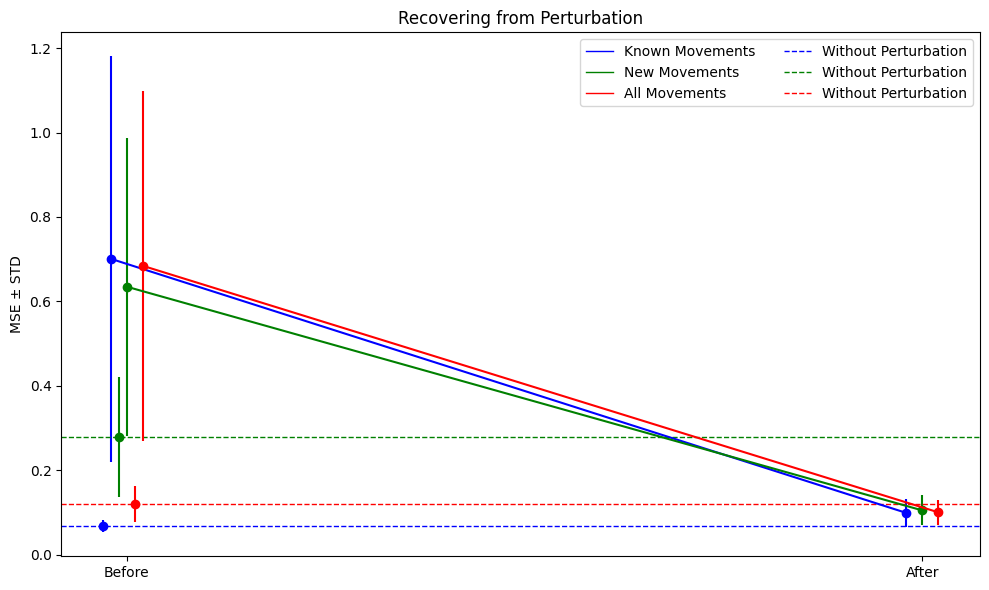

In [25]:
# PLOT perturbation results only

# Create a figure and a single set of axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set index
df.set_index('participants', inplace=True, drop=False)

# Modes to plot
modes = ['val', 'test', 'total']
colors = ['blue', 'green', 'red']  # Different colors for each mode
labels = ['Known Movements', 'New Movements', 'All Movements']  # Labels for each mode

# X positions for 'before' and 'after'
x_positions = np.arange(2)  # Positions for 'before' and 'after'
bar_width = 0.02  # Used for shifting

# Create a list to store custom legend handles
custom_legend_handles = []
custom_legend_handles2 = []


# Plot each mode on the same axes
for idx, (mode, color, label) in enumerate(zip(modes, colors, labels)):
    # Extract data
    means_before = []
    means_after = []

    for participant in participants:
        means_before.append(df.loc[participant, ('pert_init', mode)])
        means_after.append(df.loc[participant, ('pert_offline', mode)])

    # Convert lists to numpy arrays
    means_before = np.array(means_before)
    means_after = np.array(means_after)

    # Calculate mean and std for plotting
    mean_before = np.mean(means_before)
    mean_after = np.mean(means_after)
    std_before = np.std(means_before)
    std_after = np.std(means_after)

    # Calculate the mean of 'init' for the dotted horizontal line
    mean_init = np.mean([df.loc[participant, ('init', mode)] for participant in participants])
    std_init = np.std([df.loc[participant, ('init', mode)] for participant in participants])

    # X offset for each mode to avoid overlap
    x_offset = (idx - 1) * bar_width  # Shift each line plot slightly

    # Plot mean and std for each mode with error bars
    ax.errorbar(x_positions + x_offset, 
                [mean_before, mean_after], 
                yerr=[std_before, std_after], 
                fmt='-o', 
                color=color,
                label=label)

    # Plot dotted horizontal line for each mode
    ax.errorbar(x_positions[0] + x_offset - 0.01, 
            [mean_init], 
            yerr=[std_init], 
            fmt='-o', 
            color=color,
            label=label)
    ax.axhline(y=mean_init, color=color, linestyle='--', linewidth=1)

    # Add custom legend handles for solid and dotted lines
    custom_legend_handles.append(Line2D([0], [0], color=color, linestyle='-', linewidth=1, label=label))
    custom_legend_handles2.append(Line2D([0], [0], color=color, linestyle='--', linewidth=1, label='Without'
                                                                                                   ' Perturbation'))

# Set titles and labels
ax.set_title('Recovering from Perturbation')
ax.set_ylabel('MSE ± STD')

# Adjust x-axis ticks and labels
ax.set_xticks(x_positions)
ax.set_xticklabels(['Before', 'After'])

custom_legend_handles = custom_legend_handles + custom_legend_handles2
# Add legend with custom handles in the desired order and set ncol to 2
ax.legend(handles=custom_legend_handles, loc='upper right', ncol=2)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
plt.close(fig)


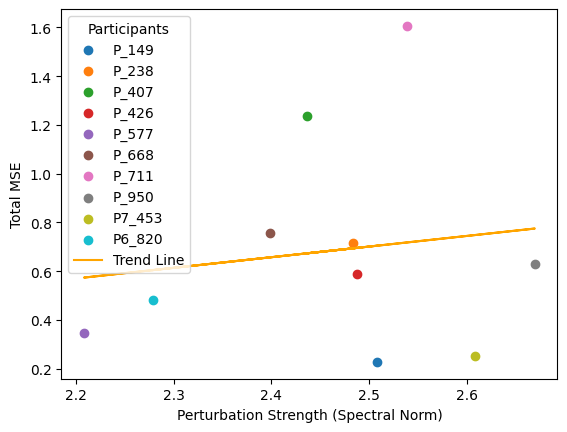

In [26]:
# PLOT perturbation strength only
x = df.loc[:, ('pert', 'spectral_norm')]
y = df.loc[:, ('pert_init', 'total')]

# plt.scatter(x, y, c='red')
for i in range(len(x)):
    plt.scatter(x[i], y[i], label=participants[i])
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='orange', label='Trend Line')
plt.xlabel('Perturbation Strength (Spectral Norm)')
plt.ylabel('Total MSE')
plt.legend(title='Participants')

plt.show()
plt.close(fig)


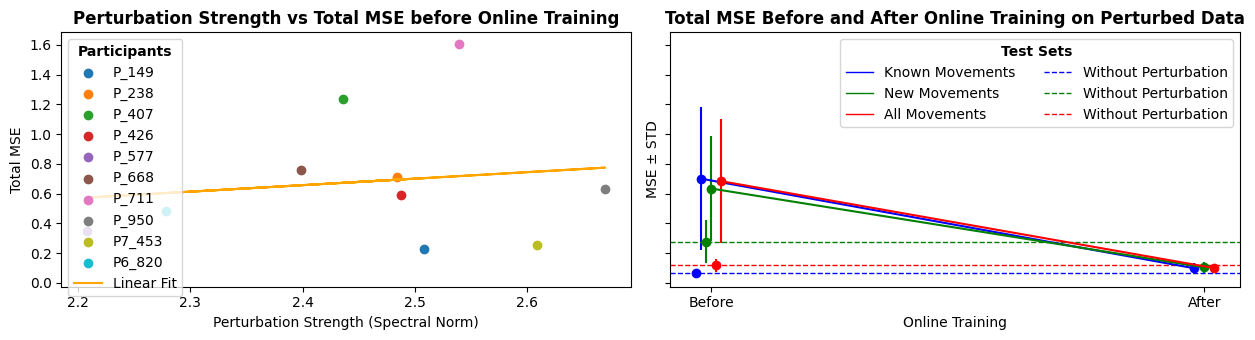

In [27]:
# PLOT perturbation combined
plt.close('all')
# Create the figure and axes with two subplots next to each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18*0.7, 5*0.7), sharey=True) # , width_ratios=[2.5, 3]

# Plot 1: Perturbation Strength vs Total MSE
x = df.loc[:, ('pert', 'spectral_norm')]
y = df.loc[:, ('pert_init', 'total')]

# Scatter plot with individual points labeled by participant
for i in range(len(x)):
    ax1.scatter(x[i], y[i], label=participants[i])

# Fit a trend line and plot it
m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x + b, color='orange', label='Linear Fit')

# Labels and legend for the first plot
ax1.set_xlabel('Perturbation Strength (Spectral Norm)')
ax1.set_ylabel('Total MSE')
ax1.legend(title='Participants', loc='upper left', title_fontproperties={'weight':'bold'})
ax1.set_title('Perturbation Strength vs Total MSE before Online Training', fontweight='bold')

# Plot 2: Recovering from Perturbation

# Modes to plot
modes = ['val', 'test', 'total']
colors = ['blue', 'green', 'red']  # Different colors for each mode
labels = ['Known Movements', 'New Movements', 'All Movements']  # Labels for each mode

# X positions for 'before' and 'after'
x_positions = np.arange(2)  # Positions for 'before' and 'after'
bar_width = 0.02  # Used for shifting

# Create a list to store custom legend handles
custom_legend_handles = []
custom_legend_handles2 = []

# Plot each mode on the same axes
for idx, (mode, color, label) in enumerate(zip(modes, colors, labels)):
    # Extract data
    means_before = []
    means_after = []

    for participant in participants:
        means_before.append(df.loc[participant, ('pert_init', mode)])
        means_after.append(df.loc[participant, ('pert_offline', mode)])

    # Convert lists to numpy arrays
    means_before = np.array(means_before)
    means_after = np.array(means_after)

    # Calculate mean and std for plotting
    mean_before = np.mean(means_before)
    mean_after = np.mean(means_after)
    std_before = np.std(means_before)
    std_after = np.std(means_after)

    # Calculate the mean of 'init' for the dotted horizontal line
    mean_init = np.mean([df.loc[participant, ('init', mode)] for participant in participants])
    std_init = np.std([df.loc[participant, ('init', mode)] for participant in participants])

    # X offset for each mode to avoid overlap
    x_offset = (idx - 1) * bar_width  # Shift each line plot slightly
    
    # Plot mean and std for each mode with error bars
    ax2.errorbar(x_positions + x_offset, 
                [mean_before, mean_after], 
                yerr=[std_before, std_after], 
                fmt='-o', 
                color=color,
                label=label)

    # Plot dotted horizontal line for each mode
    ax2.errorbar(x_positions[0] + x_offset - 0.01, 
            [mean_init], 
            yerr=[std_init], 
            fmt='-o', 
            color=color,
            label=label)
    ax2.axhline(y=mean_init, color=color, linestyle='--', linewidth=1)

    # Add custom legend handles for solid and dotted lines
    custom_legend_handles.append(Line2D([0], [0], color=color, linestyle='-', linewidth=1, label=label))
    custom_legend_handles2.append(Line2D([0], [0], color=color, linestyle='--', linewidth=1, label='Without Perturbation'))

# Set titles and labels
ax2.set_title('Total MSE Before and After Online Training on Perturbed Data', fontweight='bold')
ax2.set_ylabel('MSE ± STD')

# Adjust x-axis ticks and labels
ax2.set_xticks(x_positions)
ax2.set_xticklabels(['Before', 'After'])
ax2.set_xlabel('Online Training')

custom_legend_handles = custom_legend_handles + custom_legend_handles2
# Add legend with custom handles in the desired order and set ncol to 2
ax2.legend(handles=custom_legend_handles, loc='upper right', ncol=2, title='Test Sets', title_fontproperties={'weight':'bold'})

# Adjust layout to make sure everything fits nicely
plt.tight_layout()


plt.show()
# plt.savefig(plot_folder / 'perturbation.png', dpi=300)
plt.close(fig)


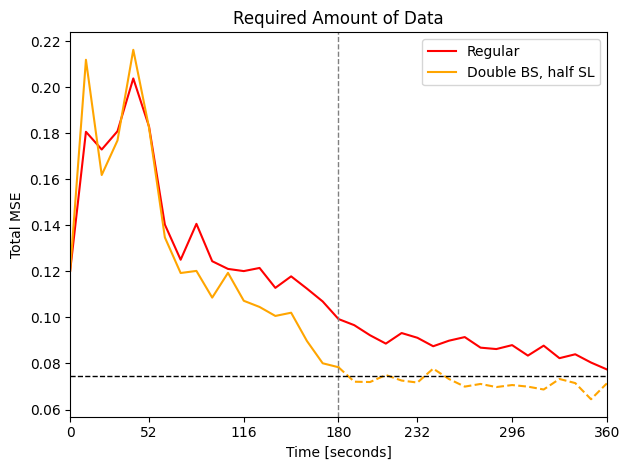

In [28]:
# PLOT data amount
# Subsample the data
subsampled_best = total_df_best.mean(axis=0).iloc[::2].copy()
subsampled_best.index = range(0, len(subsampled_best))

# Compute the last value of 'Regular'
last_value_regular = total_df_offline.mean(axis=0).iloc[-1]
last_value_best = total_df_best.mean(axis=0).iloc[-1]

# Calculate the position corresponding to 180 seconds
x_180 = 180 * len(total_df_offline.mean(axis=0)) / 360

# Prepare x and y values
x_values = np.arange(len(subsampled_best))
y_values = subsampled_best

# Find indices around 180 seconds
idx_180 = np.searchsorted(x_values, x_180, side='left')

# Split the data into segments
x_before = x_values[:idx_180]
y_before = y_values.iloc[:idx_180]

x_after = x_values[idx_180 - 1:]
y_after = y_values.iloc[idx_180 - 1:]

plt.plot(total_df_offline.mean(axis=0), label='Regular', color='red')

# Plot the 'Double BS, half SL' data with dashed line after 180 seconds
plt.plot(x_before, y_before, linestyle='-', color='orange', label='Double BS, half SL')
plt.plot(x_after, y_after, linestyle='--', color='orange')

# Set title and labels
plt.title('Required Amount of Data')
plt.ylabel('Total MSE')  # Label y-axis
plt.xlabel('Time [seconds]')  # Label x-axis

# Set x-axis limits and scale
num_ticks = 7
tick_positions = np.linspace(0, len(total_df_offline.mean(axis=0)) - 1, num_ticks, dtype=int)
tick_labels = [int(i * 360 / (len(total_df_offline.mean(axis=0)) - 1)) for i in tick_positions]

plt.xticks(ticks=tick_positions, labels=tick_labels)
plt.xlim(0, len(total_df_offline.mean(axis=0)) - 1)  # Set x-axis limit based on the data length

# Add vertical line at 180 seconds
plt.axvline(x=tick_positions[3], color='gray', linestyle='--', linewidth=1)

# Add horizontal line at the last value of 'Regular'
plt.axhline(y=(last_value_regular + last_value_best) / 2, color='black', linestyle='--', linewidth=1)

# Add legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
plt.close(fig)

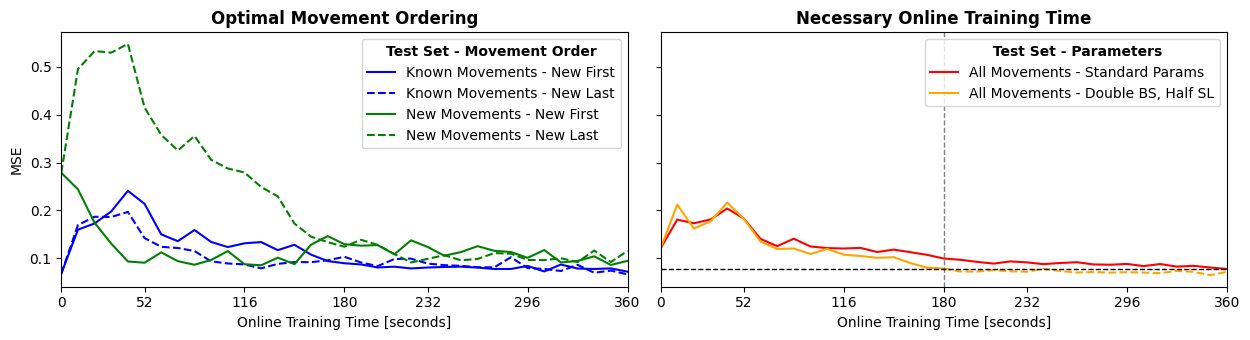

In [29]:
# PLOT data

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18*0.7, 5*0.7), sharey=True)
# Set x-axis limits and scale
num_ticks = 7
tick_positions = np.linspace(0, len(total_df_offline.mean(axis=0)) - 1, num_ticks, dtype=int)
tick_labels = [int(i * 360 / (len(total_df_offline.mean(axis=0)) - 1)) for i in tick_positions]

# Plot 1: Validation and Test Loss
ax1.plot(val_df_offline.mean(axis=0), label='Known Movements - New First', color='blue', linestyle='-')
ax1.plot(val_df_inverse.mean(axis=0), label='Known Movements - New Last', color='blue', linestyle='--')
ax1.plot(test_df_offline.mean(axis=0), label='New Movements - New First', color='green')
ax1.plot(test_df_inverse.mean(axis=0), label='New Movements - New Last', color='green', linestyle='--')
ax1.set_ylabel('MSE')
ax1.set_title('Optimal Movement Ordering', fontweight='bold')
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels)
ax1.set_xlim(0, len(total_df_offline.mean(axis=0)) - 1)  # Set x-axis limit based on the data length
ax1.legend(title='Test Set - Movement Order', loc='upper right', title_fontproperties={'weight':'bold'})
ax1.set_xlabel('Online Training Time [seconds]')  # Label x-axis


# Prepare x and y values for Plot 2
subsampled_best = total_df_best.mean(axis=0).iloc[::2].copy()
subsampled_best.index = range(0, len(subsampled_best))

# Compute the last value of 'Regular'
last_value_regular = total_df_offline.mean(axis=0).iloc[-1]
last_value_best = total_df_best.mean(axis=0).iloc[-1]

# Calculate the position corresponding to 180 seconds
x_180 = 180 * len(total_df_offline.mean(axis=0)) / 360

# Prepare x and y values
x_values = np.arange(len(subsampled_best))
y_values = subsampled_best

# Find indices around 180 seconds
idx_180 = np.searchsorted(x_values, x_180, side='left')

# Split the data into segments
x_before = x_values[:idx_180]
y_before = y_values.iloc[:idx_180]

x_after = x_values[idx_180 - 1:]
y_after = y_values.iloc[idx_180 - 1:]

# Plot 2: Total Loss with additional features
ax2.plot(total_df_offline.mean(axis=0), label='All Movements - Standard Params', color='red')

# Plot the 'Double BS, half SL' data with dashed line after 180 seconds
ax2.plot(x_before, y_before, linestyle='-', color='orange', label='All Movements - Double BS, Half SL')
ax2.plot(x_after, y_after, linestyle='--', color='orange')

# Set title and labels
ax2.set_title('Necessary Online Training Time', fontweight='bold')
# ax2.set_ylabel('Total MSE')  # Label y-axis
ax2.set_xlabel('Online Training Time [seconds]')  # Label x-axis

# Set x-axis limits and scale
ax2.set_xticks(tick_positions)
ax2.set_xticklabels(tick_labels)
ax2.set_xlim(0, len(total_df_offline.mean(axis=0)) - 1)  # Set x-axis limit based on the data length

# Add vertical line at 180 seconds
ax2.axvline(x=tick_positions[3], color='gray', linestyle='--', linewidth=1)

# Add horizontal line at the last value of 'Regular'
# ax2.axhline(y=(last_value_regular + last_value_best) / 2, color='black', linestyle='--', linewidth=1)
ax2.axhline(y=last_value_regular, color='black', linestyle='--', linewidth=1)

# Add legend
ax2.legend(title='  Test Set - Parameters', loc='upper right', title_fontproperties={'weight':'bold'})

# Adjust layout
plt.tight_layout()

# plt.savefig(plot_folder / 'data.png', dpi=300)
plt.show()
plt.close(fig)


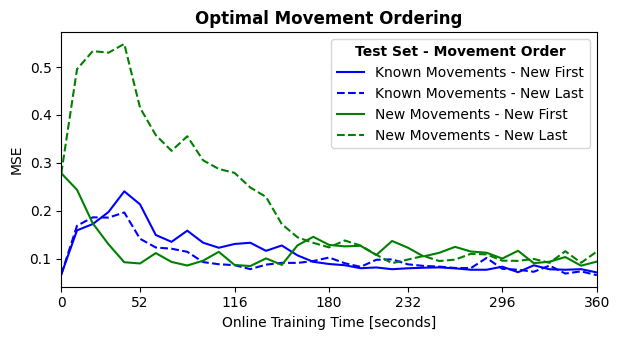

In [162]:
# PLOT data

# Create a figure and one subplot (remove the second subplot)
fig, ax1 = plt.subplots(figsize=(9*0.7, 5*0.7))

# Set x-axis limits and scale
num_ticks = 7
tick_positions = np.linspace(0, len(total_df_offline.mean(axis=0)) - 1, num_ticks, dtype=int)
tick_labels = [int(i * 360 / (len(total_df_offline.mean(axis=0)) - 1)) for i in tick_positions]

# Plot: Validation and Test Loss
ax1.plot(val_df_offline.mean(axis=0), label='Known Movements - New First', color='blue', linestyle='-')
ax1.plot(val_df_inverse.mean(axis=0), label='Known Movements - New Last', color='blue', linestyle='--')
ax1.plot(test_df_offline.mean(axis=0), label='New Movements - New First', color='green')
ax1.plot(test_df_inverse.mean(axis=0), label='New Movements - New Last', color='green', linestyle='--')
ax1.set_ylabel('MSE')
ax1.set_title('Optimal Movement Ordering', fontweight='bold')
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels)
ax1.set_xlim(0, len(total_df_offline.mean(axis=0)) - 1)  # Set x-axis limit based on the data length
ax1.legend(title='Test Set - Movement Order', loc='upper right', title_fontproperties={'weight':'bold'})
ax1.set_xlabel('Online Training Time [seconds]')  # Label x-axis

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Close the figure to release memory
plt.close(fig)


In [93]:
# predict trajectories

import argparse
import math
import os
import yaml
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'
import torch
import numpy as np
from os.path import join
import wandb
import multiprocessing

from helpers.predict_utils import Config, get_data, train_model, rescale_data, evaluate_model
from helpers.models import TimeSeriesRegressorWrapper

for person_dir in online_participants:
    for perturb in [True, False]:
        
        allow_tf32 = True
        visualize = False
        config_name = 'modular_online'
        
        sampling_frequency = 60
        experiment_name = 'perturb' if perturb else 'non_perturb'
        
        device = torch.device("cpu")

        if allow_tf32:
            torch.backends.cuda.matmul.allow_tf32 = True
            print('TF32 enabled')
        
        with open(join('data', person_dir, 'configs', f'{config_name}.yaml'), 'r') as file:
            wandb_config = yaml.safe_load(file)
            config = Config(wandb_config)
        
        data_dirs = [join('data', person_dir, 'recordings', recording, 'experiments', '1') for recording in
                     config.recordings]
        
        test_dirs = [join('data', person_dir, 'recordings', recording, 'experiments', '1') for recording in
                     config.test_recordings] if config.test_recordings is not None else []
        perturb_file = join('data', person_dir, 'online_trials', experiment_name,
                            'perturber.npy')
        
        intact_hand = config.targets[0][0]
        
        trainsets, valsets, combined_sets, testsets = get_data(config, data_dirs, intact_hand, visualize=visualize, test_dirs=test_dirs, perturb_file=perturb_file)
        
        config.person_dir = person_dir
        config.intact_hand = intact_hand
        config.experiment_name = experiment_name
        config.perturb = perturb
        config.wandb_project = 'study_participants_online'
        config.wandb_mode = 'disabled'
        if perturb:
            config.name = config.name + '_perturb'
                
        wandb.init(mode=config.wandb_mode, project=config.wandb_project, name=config.name, config=config)
        config = wandb.config
        
        model = TimeSeriesRegressorWrapper(device=device, input_size=len(config.features),
                                           output_size=len(config.targets),
                                           **config)
        model.to('cpu')
        model.load(join('data', person_dir, 'online_trials', experiment_name, 'models', f'{person_dir}-online_last.pt'))
        model.to(device)
        model.eval()
        
        for recording, testset in zip(config.test_recordings, testsets):
            pred = model.predict(testset, config.features, config.targets).squeeze(0)
            save_dir = data_folder / 'trajectories' / person_dir / recording / f"perturb_{perturb}" / 'after_online'
            os.makedirs(save_dir, exist_ok=True)
            np.save(save_dir / 'pred.npy' , pred)
            
        for recording, valset in zip(config.recordings, valsets):
            pred = model.predict(valset, config.features, config.targets).squeeze(0)
            save_dir = data_folder / 'trajectories' / person_dir / recording / f"perturb_{perturb}" / 'after_online'
            os.makedirs(save_dir, exist_ok=True)
            np.save(save_dir / 'pred.npy', pred)

            
            
        model.to('cpu')
        model.load(join('data', person_dir, 'online_trials', experiment_name, 'models', f'{person_dir}-online_0.pt'))
        model.to(device)
        model.eval()

        for recording, testset in zip(config.test_recordings, testsets):
            pred = model.predict(testset, config.features, config.targets).squeeze(0)
            save_dir = data_folder / 'trajectories' / person_dir / recording / f"perturb_{perturb}" / 'before_online'
            os.makedirs(save_dir, exist_ok=True)
            np.save(save_dir / 'pred.npy', pred)

        for recording, valset in zip(config.recordings, valsets):
            pred = model.predict(valset, config.features, config.targets).squeeze(0)
            save_dir = data_folder / 'trajectories' / person_dir / recording / f"perturb_{perturb}" / 'before_online'
            os.makedirs(save_dir, exist_ok=True)
            np.save(save_dir / 'pred.npy', pred)
            

        # GT
        for recording, testset in zip(config.test_recordings, testsets):
            pred = testset[config.targets].values
            save_dir = data_folder / 'trajectories' / person_dir / recording / 'GT'
            os.makedirs(save_dir, exist_ok=True)
            np.save(save_dir / 'pred.npy', pred)

        for recording, valset in zip(config.recordings, valsets):
            pred = valset[config.targets].values
            save_dir = data_folder / 'trajectories' / person_dir / recording / 'GT'
            os.makedirs(save_dir, exist_ok=True)
            np.save(save_dir / 'pred.npy', pred)



TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

In [213]:
# # predict trajectories SANITY CHECK

# import argparse
# import math
# import os
# import yaml
# os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'
# import torch
# import numpy as np
# from os.path import join
# import wandb
# import multiprocessing

# from helpers.predict_utils import Config, get_data, train_model, rescale_data, evaluate_model
# from helpers.models import TimeSeriesRegressorWrapper

# for person_dir in ['P6_']:
#     for perturb in [True, False]:
        
#         allow_tf32 = True
#         visualize = False
#         config_name = 'modular_online'
        
#         sampling_frequency = 60
#         experiment_name = 'perturb' if perturb else 'non_perturb'
        
#         device = torch.device("cpu")

#         if allow_tf32:
#             torch.backends.cuda.matmul.allow_tf32 = True
#             print('TF32 enabled')
        
#         with open(join('data', person_dir, 'configs', f'{config_name}.yaml'), 'r') as file:
#             wandb_config = yaml.safe_load(file)
#             config = Config(wandb_config)
        
#         data_dirs = [join('data', person_dir, 'recordings', recording, 'experiments', '1') for recording in
#                      config.recordings]
        
#         test_dirs = [join('data', person_dir, 'recordings', recording, 'experiments', '1') for recording in
#                      config.test_recordings] if config.test_recordings is not None else []
#         perturb_file = join('data', person_dir, 'online_trials', experiment_name,
#                             'perturber.npy')
        
#         intact_hand = config.targets[0][0]
        
#         trainsets, valsets, combined_sets, testsets = get_data(config, data_dirs, intact_hand, visualize=visualize, test_dirs=test_dirs, perturb_file=perturb_file)
        
#         config.person_dir = person_dir
#         config.intact_hand = intact_hand
#         config.experiment_name = experiment_name
#         config.perturb = perturb
#         config.wandb_project = 'study_participants_online'
#         config.wandb_mode = 'disabled'
#         if perturb:
#             config.name = config.name + '_perturb'
                
#         wandb.init(mode=config.wandb_mode, project=config.wandb_project, name=config.name, config=config)
#         config = wandb.config
        
#         model = TimeSeriesRegressorWrapper(device=device, input_size=len(config.features),
#                                            output_size=len(config.targets),
#                                            **config)
#         # model.to('cpu')
#         # model.load(join('data', person_dir, 'online_trials', experiment_name, 'models', f'{person_dir}-online_last.pt'))
#         # model.to(device)
#         # model.eval()
        
#         # for recording, testset in zip(config.test_recordings, testsets):
#         #     pred = model.predict(testset, config.features, config.targets).squeeze(0)
#         #     save_dir = data_folder / 'trajectories' / person_dir / recording / f"perturb_{perturb}" / 'after_online'
#         #     os.makedirs(save_dir, exist_ok=True)
#         #     np.save(save_dir / 'pred.npy' , pred)
            
#         # for recording, valset in zip(config.recordings, valsets):
#         #     pred = model.predict(valset, config.features, config.targets).squeeze(0)
#         #     save_dir = data_folder / 'trajectories' / person_dir / recording / f"perturb_{perturb}" / 'after_online'
#         #     os.makedirs(save_dir, exist_ok=True)
#         #     np.save(save_dir / 'pred.npy', pred)

            
            
#         model.to('cpu')
#         model.load(join('data', person_dir, 'models', f'sanity_check.pt'))
#         model.to(device)
#         model.eval()

#         for recording, testset in zip(config.test_recordings, testsets):
#             pred = model.predict(testset, config.features, config.targets).squeeze(0)
#             save_dir = data_folder / 'trajectories' / person_dir / recording / f"perturb_{perturb}" / 'before_online'
#             os.makedirs(save_dir, exist_ok=True)
#             np.save(save_dir / 'pred-SC.npy', pred)

#         for recording, valset in zip(config.recordings, valsets):
#             pred = model.predict(valset, config.features, config.targets).squeeze(0)
#             save_dir = data_folder / 'trajectories' / person_dir / recording / f"perturb_{perturb}" / 'before_online'
#             os.makedirs(save_dir, exist_ok=True)
#             np.save(save_dir / 'pred-SC.npy', pred)
            

#         # # GT
#         # for recording, testset in zip(config.test_recordings, testsets):
#         #     pred = testset[config.targets].values
#         #     save_dir = data_folder / 'trajectories' / person_dir / recording / 'GT'
#         #     os.makedirs(save_dir, exist_ok=True)
#         #     np.save(save_dir / 'pred.npy', pred)

#         # for recording, valset in zip(config.recordings, valsets):
#         #     pred = valset[config.targets].values
#         #     save_dir = data_folder / 'trajectories' / person_dir / recording / 'GT'
#         #     os.makedirs(save_dir, exist_ok=True)
#         #     np.save(save_dir / 'pred.npy', pred)



TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

TF32 enabled


/Users/jg/projects/biomech/biomech_PCP/helpers/models.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path, map_location=torch.de

In [102]:
test_recordings

['keyOpCl', 'wristFlHandCl', 'indexFlDigitsEx']

In [103]:
recordings

['thumbFlEx',
 'thumbAbAd',
 'indexFlEx',
 'mrpFlEx',
 'fingersFlEx',
 'wristFlEx',
 'handOpCl',
 'pinchOpCl',
 'pointOpCl']

In [104]:
targets

['indexAng',
 'midAng',
 'ringAng',
 'pinkyAng',
 'thumbInPlaneAng',
 'thumbOutPlaneAng',
 'wristFlex']

In [109]:
online_participants

['P_149',
 'P_238',
 'P_407',
 'P_426',
 'P_577',
 'P_668',
 'P_711',
 'P_950',
 'P7_453']

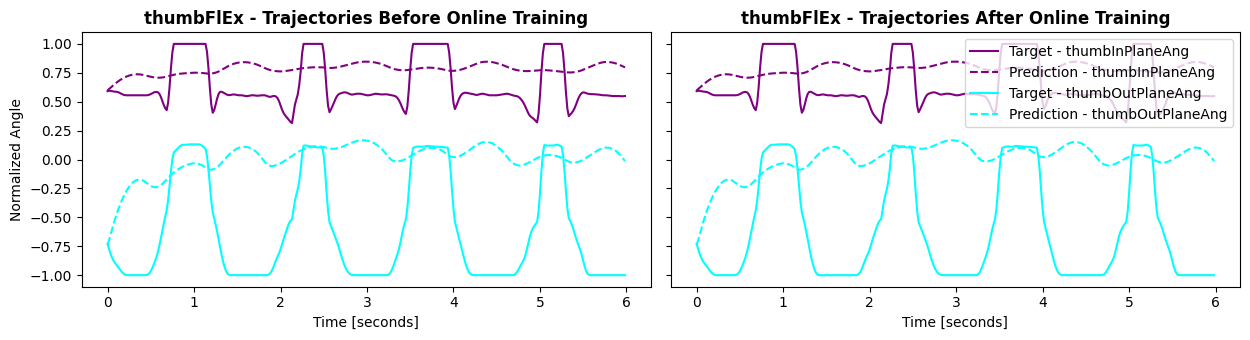

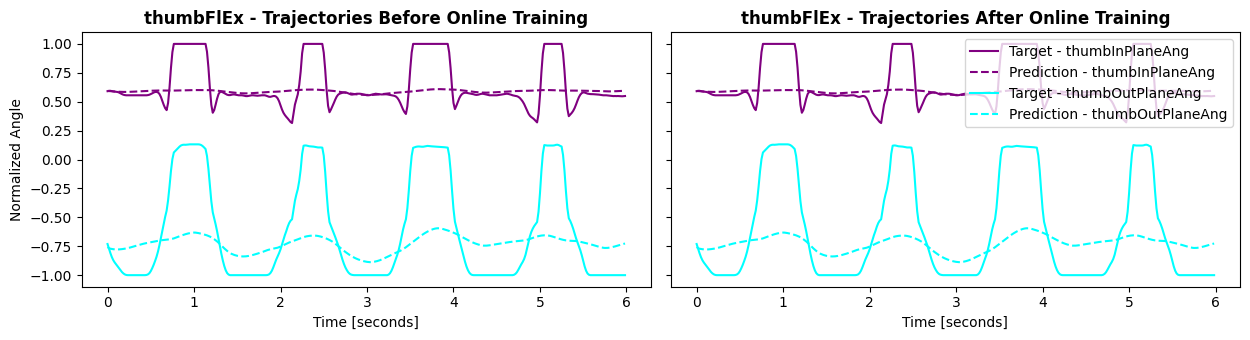

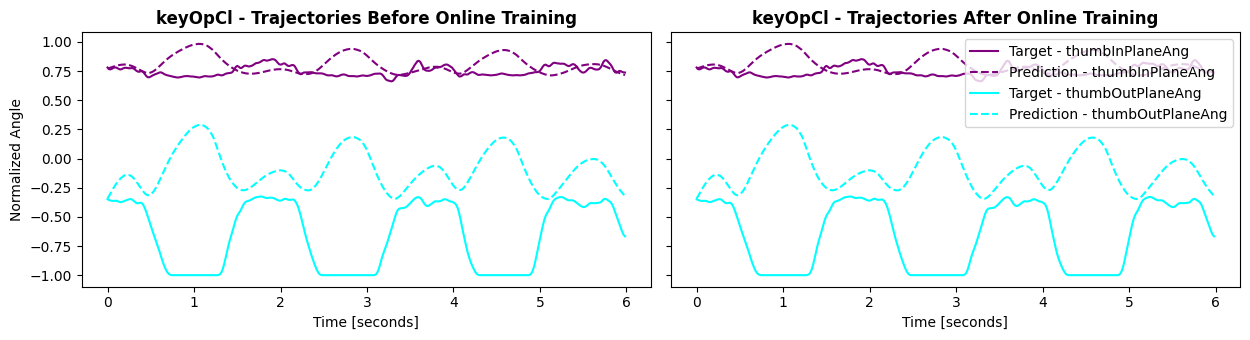

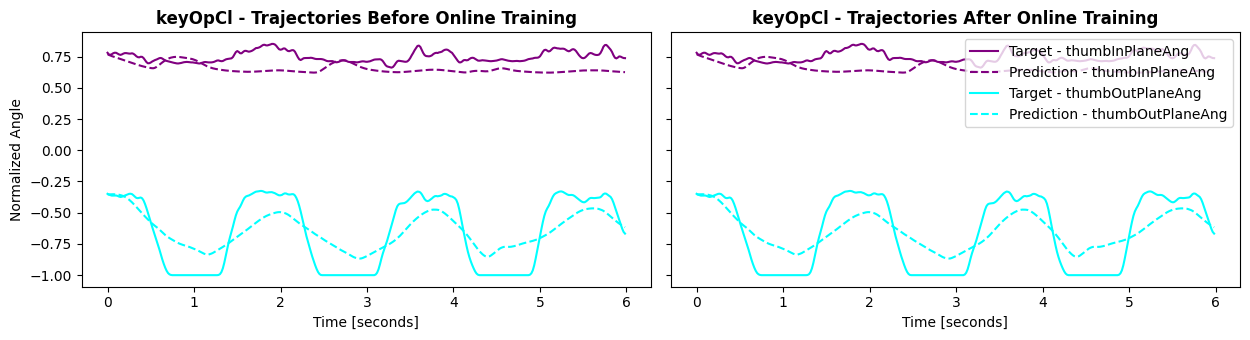

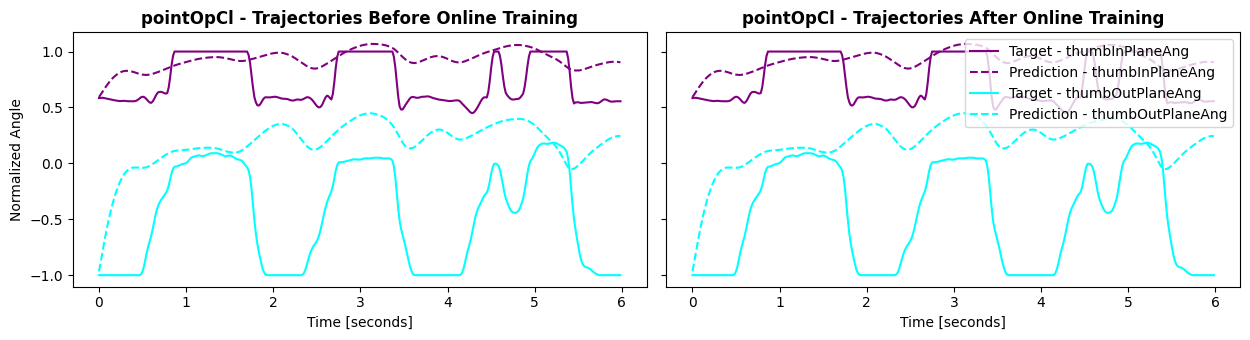

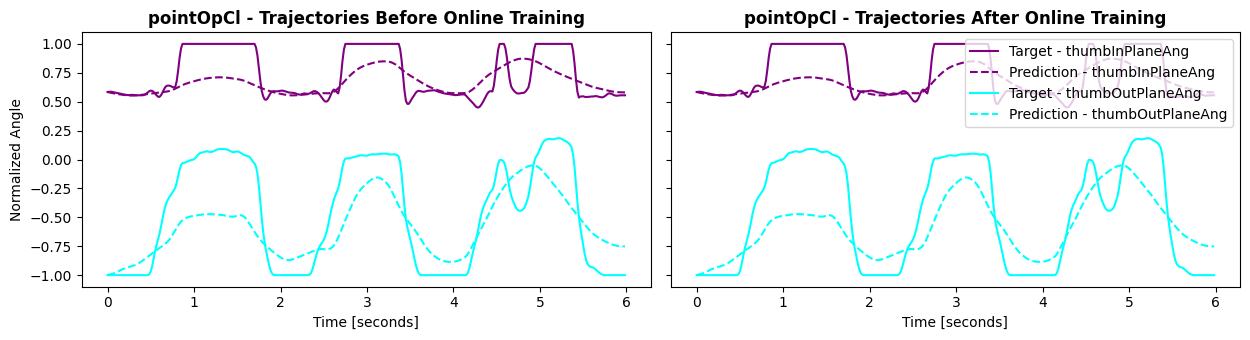

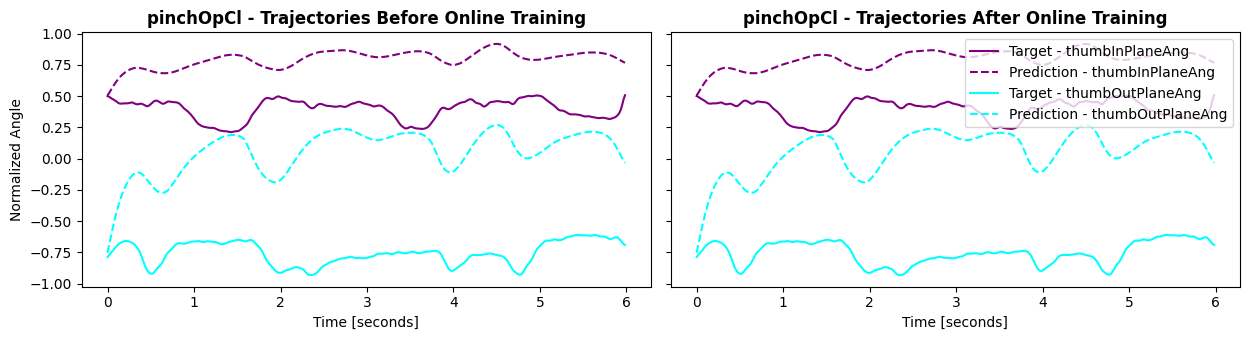

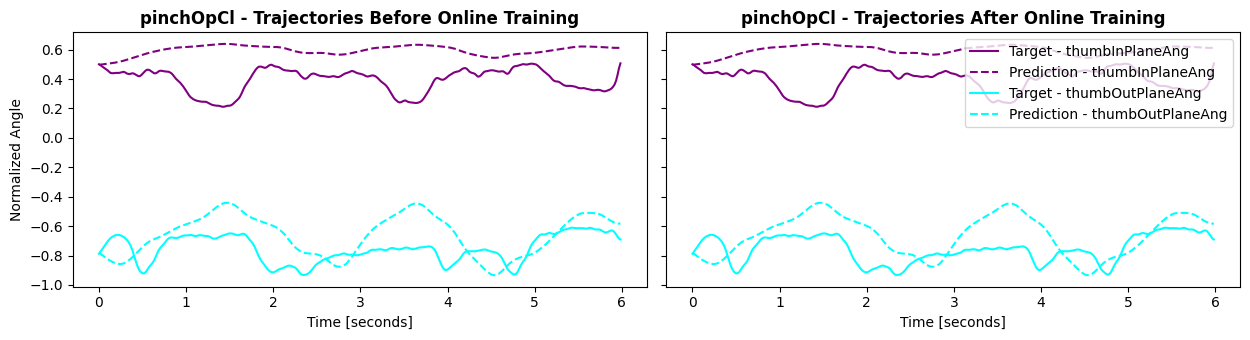

In [214]:
# PLOT trajectory_test

# indices = range(7)
# plot_participants = online_participants
# plot_recordings = recordings + test_recordings

plot_participants = ['P6_820']
plot_folder = Path('full_page_plots')

# 1
indices = [4, 5] # ['indexAng', 'midAng', 'ringAng', 'pinkyAng', 'thumbInPlaneAng', 'thumbOutPlaneAng', 'wristFlex']
plot_recordings = ['thumbFlEx', 'keyOpCl', 'pinchOpCl']

# 2
# indices = [2, 6] # ['indexAng', 'midAng', 'ringAng', 'pinkyAng', 'thumbInPlaneAng', 'thumbOutPlaneAng', 'wristFlex']
# plot_recordings = ['wristFlEx', 'wristFlHandCl', 'handOpCl']

# 3
# indices = [0, 1] # ['indexAng', 'midAng', 'ringAng', 'pinkyAng', 'thumbInPlaneAng', 'thumbOutPlaneAng', 'wristFlex']
# plot_recordings = ['indexFlDigitsEx', 'mrpFlEx', 'pointOpCl']


colors = ['#FF0000', '#0000FF', '#00FF00', '#FFA500', '#800080', '#00FFFF', '#FF00FF']
for person_id in plot_participants:
    for recording in plot_recordings:
        # person_id = 'P7_453'
        # recording = 'fingersFlEx'
        for perturb in [True, False]:
                        
            gt_path = data_folder / 'trajectories' / person_id / recording / 'GT'
            before_path = data_folder / 'trajectories' / person_id / recording / f"perturb_{perturb}" / 'before_online'
            after_path = data_folder / 'trajectories' / person_id / recording / f"perturb_{perturb}" / 'before_online'
            
            gt = np.load(gt_path / 'pred.npy')
            before = np.load(before_path / 'pred.npy')
            after = np.load(after_path / 'pred.npy')
            
            x_values = range(len(gt))
            
            # Create a figure and two subplots side by side
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18*0.7, 5*0.7), sharey=True)
            
            # Plot on the first subplot
            for i in indices:
                ax1.plot(x_values, gt[:, i], label=f'Target - {targets[i]}', color=colors[i])
                ax1.plot(x_values, before[:, i], label=f'Prediction - {targets[i]}', color=colors[i], linestyle='--')
            
                ax2.plot(x_values, gt[:, i], label=f'Target - {targets[i]}', color=colors[i])
                ax2.plot(x_values, after[:, i], label=f'Prediction - {targets[i]}', color=colors[i], linestyle='--')
                
            ax1.set_xlabel('Time [seconds]')  # Original x-axis label
            ax1.set_ylabel('Normalized Angle')  # y-axis label
            ax1.set_title(f'{recording} - Trajectories Before Online Training', fontweight='bold')  # Title
            # Set x-axis ticks and labels for ax1
            ax1.set_xticks(range(0, len(x_values)+1, 60))  # Set ticks based on the length of x_values
            ax1.set_xticklabels([f'{i}' for i in range(len(x_values)//60+1)])  # Scale labels from 0 to 6
            
            ax2.set_xlabel('Time [seconds]')  # Original x-axis label
            # ax2.set_ylabel('Normalized Angle')  # y-axis label (shared with ax1)
            ax2.set_title(f'{recording} - Trajectories After Online Training', fontweight='bold')  # Title
            ax2.legend(loc='upper right')
            # Set x-axis ticks and labels for ax2
            ax2.set_xticks(range(0, len(x_values)+1, 60))  # Set ticks based on the length of x_values
            ax2.set_xticklabels([f'{i}' for i in range(len(x_values)//60+1)])  # Scale labels from 0 to 6   
            
            
            
            # Adjust layout to prevent overlap
            plt.tight_layout()
            save_dir = plot_folder / 'trajectories' / f'perturb_{perturb}' / recording
            os.makedirs(save_dir, exist_ok=True)
            # plt.savefig(save_dir / f'{person_id}.png', dpi=300)
            plt.show()
            plt.close(fig)